# Classification for Prediction

<p> Here, we want to classify cheaters. Today's data set reports the results of an old survey of married people. Each row is associated to a person, whereas the columns report:
<ul>
<li><b>age, children</b>: age and number of children
<li><b>religious</b>: the person's religiousness
<li><b>educ</b>: the person's education level 
<li><b>occupation</b>: a code that identifies the person's occupation
<li><b>rate_marriage</b>: how the person rates his or her marriage,
<li><b>yrs_married</b>: length of the marriage, in years
<li><b>affairs</b>: time spent, in hours/week, in extra-marital affairs 
</ul></p>
<p>That is all we need to know about the columns' meaning.</p>

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk

Populating the interactive namespace from numpy and matplotlib


In [70]:
df = pd.read_csv('affairs.csv', index_col=0)

# Let's investigate the affairs column

In [71]:
df.head()

rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0              3  32.0          9.0       3.0          3    17           2   
1              3  27.0         13.0       3.0          1    14           3   
2              4  22.0          2.5       0.0          1    16           3   
3              4  37.0         16.5       4.0          3    16           5   
4              5  27.0          9.0       1.0          1    14           3   

    affairs  
0  0.111111  
1  3.230769  
2  1.400000  
3  0.727273  
4  4.666666

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6365
Data columns (total 8 columns):
rate_marriage    6366 non-null int64
age              6366 non-null float64
yrs_married      6366 non-null float64
children         6366 non-null float64
religious        6366 non-null int64
educ             6366 non-null int64
occupation       6366 non-null int64
affairs          6366 non-null float64
dtypes: float64(4), int64(4)
memory usage: 447.6 KB


In [74]:
df.isna().any()

rate_marriage    False
age              False
yrs_married      False
children         False
religious        False
educ             False
occupation       False
affairs          False
dtype: bool

In [75]:
df_affairs=df[df.affairs!=0]

In [76]:
df_affairs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 0 to 2052
Data columns (total 8 columns):
rate_marriage    2053 non-null int64
age              2053 non-null float64
yrs_married      2053 non-null float64
children         2053 non-null float64
religious        2053 non-null int64
educ             2053 non-null int64
occupation       2053 non-null int64
affairs          2053 non-null float64
dtypes: float64(4), int64(4)
memory usage: 144.4 KB


In [77]:
df_affairs.groupby('affairs')['affairs'].size().head()

affairs
0.043478    22
0.060606    22
0.076923    25
0.111111    29
0.152174    57
Name: affairs, dtype: int64

In [78]:
df2=df_affairs.copy()

In [79]:
df2['hrs']=pd.qcut(df2.affairs, 10)

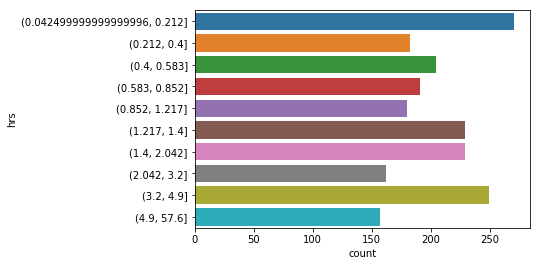

In [80]:
sns.countplot(y='hrs', data=df2)

In [81]:
df2['hrs-5']=pd.cut(df2.affairs, bins=(0,1,2,5,60))

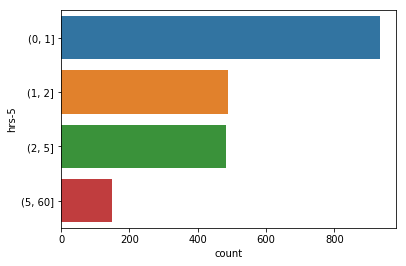

In [82]:
sns.countplot(y='hrs-5', data=df2)

# Clean Data

Make a binary attribute to indicate cheaters

In [83]:
df['affairsBin'] = (df.affairs > 0)*1.0

In [16]:
df.affairsBin.mean()

0.3224945020420987

This 32% makes it a very good classification/prediction problem. If it is 99 or 1%, then it will be very hard to predict or the dataset is not good.

In [84]:
df.head()

rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0              3  32.0          9.0       3.0          3    17           2   
1              3  27.0         13.0       3.0          1    14           3   
2              4  22.0          2.5       0.0          1    16           3   
3              4  37.0         16.5       4.0          3    16           5   
4              5  27.0          9.0       1.0          1    14           3   

    affairs  affairsBin  
0  0.111111         1.0  
1  3.230769         1.0  
2  1.400000         1.0  
3  0.727273         1.0  
4  4.666666         1.0

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage    6366 non-null int64
age              6366 non-null float64
yrs_married      6366 non-null float64
children         6366 non-null float64
religious        6366 non-null int64
educ             6366 non-null int64
occupation       6366 non-null int64
affairs          6366 non-null float64
affairsBin       6366 non-null float64
dtypes: float64(5), int64(4)
memory usage: 497.3 KB


Occupation is a unique set of number, Let's make dummy variable for occupation

In [86]:
df.occupation.unique()

array([2, 3, 5, 4, 1, 6])

In [87]:
df = pd.get_dummies(df,columns=['occupation'])

In [88]:
df.head()

rate_marriage   age  yrs_married  children  religious  educ   affairs  \
0              3  32.0          9.0       3.0          3    17  0.111111   
1              3  27.0         13.0       3.0          1    14  3.230769   
2              4  22.0          2.5       0.0          1    16  1.400000   
3              4  37.0         16.5       4.0          3    16  0.727273   
4              5  27.0          9.0       1.0          1    14  4.666666   

   affairsBin  occupation_1  occupation_2  occupation_3  occupation_4  \
0         1.0             0             1             0             0   
1         1.0             0             0             1             0   
2         1.0             0             0             1             0   
3         1.0             0             0             0             0   
4         1.0             0             0             1             0   

   occupation_5  occupation_6  
0             0             0  
1             0             0  
2             0             0  
3             1             0  
4             0             0

Make X and Y

In [89]:
X = df.drop(['affairsBin','affairs'],axis=1)

In [90]:
Y = df.affairsBin

# Hold-out sample

Split the data into 70% training and 30% test

In [91]:
from sklearn.model_selection import train_test_split

In [93]:
train_test_split(X,Y,test_size=0.3,random_state = 0)

[      rate_marriage   age  yrs_married  children  religious  educ  \
 2411              5  27.0          6.0       1.0          2    16   
 4083              4  42.0         23.0       4.0          3    14   
 3196              5  37.0         23.0       4.0          2    14   
 3035              5  22.0          2.5       0.0          2    12   
 1772              3  22.0          2.5       0.0          3    14   
 5880              2  27.0          2.5       1.0          2    14   
 1237              3  32.0         16.5       4.0          2    12   
 1850              4  32.0         13.0       2.0          2    14   
 507               5  27.0          9.0       1.0          3    14   
 4809              5  32.0         16.5       3.0          1    14   
 88                3  42.0         23.0       2.0          2    12   
 2809              5  27.0          6.0       2.0          2    17   
 4609              4  32.0         13.0       2.0          4    14   
 470               2

This method train_test_split() return 4 things :

In [94]:
X_train, X_test, Y_train, Y_test = \
train_test_split(X,Y,test_size=0.3,random_state = 0)

In [95]:
len(X)

6366

In [96]:
type(X)

pandas.core.frame.DataFrame

In [97]:
type(X_train)

pandas.core.frame.DataFrame

In [98]:
len(X_train)/len(X)

0.6999685830977066

In [99]:
len(X_test)/len(X)

0.30003141690229346

In [100]:
(len(X_train) + len(X_test)) == len(X)

True

In [101]:
X_train.head()

rate_marriage   age  yrs_married  children  religious  educ  \
2411              5  27.0          6.0       1.0          2    16   
4083              4  42.0         23.0       4.0          3    14   
3196              5  37.0         23.0       4.0          2    14   
3035              5  22.0          2.5       0.0          2    12   
1772              3  22.0          2.5       0.0          3    14   

      occupation_1  occupation_2  occupation_3  occupation_4  occupation_5  \
2411             0             1             0             0             0   
4083             0             0             1             0             0   
3196             0             0             1             0             0   
3035             0             0             1             0             0   
1772             0             0             0             0             1   

      occupation_6  
2411             0  
4083             0  
3196             0  
3035             0  
1772             0


### Train on the trainining set

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
cl = RandomForestClassifier(random_state = 0)
cl.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [104]:
len(X_train)

4456

In [105]:
len(X_test)

1910

### predict on the test set

In [106]:
cl.predict(X_test)

array([1., 0., 0., ..., 1., 1., 0.])

Accuracy ..

In [107]:
(cl.predict(X_test) == Y_test).mean()

0.669109947643979

In [108]:
y_pred = cl.predict(X_test)

In [109]:
y_pred[:20]

array([1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0.])

Every classifier will also give a prediction output with probability

In [110]:
cl.predict_proba(X_test)

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.8       , 0.2       ],
       ...,
       [0.46666667, 0.53333333],
       [0.4       , 0.6       ],
       [0.835     , 0.165     ]])

In [111]:
cl.predict_proba(X_test)[:,1]

array([1.        , 0.        , 0.2       , ..., 0.53333333, 0.6       ,
       0.165     ])

In [112]:
y_pred_proba = cl.predict_proba(X_test)[:,1]

In [113]:
y_pred_proba[:20]

array([1.        , 0.        , 0.2       , 0.8       , 0.165     ,
       0.1       , 0.45      , 0.        , 0.9       , 0.3       ,
       0.03      , 0.        , 0.13457949, 0.        , 0.82833333,
       0.2       , 0.1025641 , 0.8       , 0.525     , 0.        ])

### collect scores

#### Confusion matrix

In [114]:
from sklearn.metrics import confusion_matrix

In [115]:
import sklearn.metrics as met

In [116]:
confusion_matrix(Y_test,y_pred)

array([[1033,  270],
       [ 362,  245]])

#### Accuracy

In [117]:
(y_pred == Y_test).mean()

0.669109947643979

In [118]:
met.accuracy_score(Y_test, y_pred)

0.669109947643979

#### Precision, (out of the retrieved elements, how many are actually positive?)

In [119]:
met.precision_score(Y_test,y_pred)

0.47572815533980584

In [120]:
Y_test.mean()

0.31780104712041884

#### Recall, (Among the relevant elements, how many did I retrieve?)

In [121]:
met.recall_score(Y_test,y_pred)

0.40362438220757824

#### AUC score

In [122]:
met.roc_auc_score(Y_test,y_pred_proba)

0.6633974821758432

Why we need AUC:
For every classification threshold, you obtain a different confusion matrix ==> you obtain a different specificity and sensitivity

# Cross-validation

In [123]:
from sklearn.model_selection import KFold

In [124]:
nfolds = 10

In [125]:
kf = KFold(n_splits=nfolds,random_state=0,shuffle=True)

In [126]:
avgCV_AUC = sk.model_selection.cross_val_score(cl,X,Y,cv=kf,n_jobs=-1,\
                                                    scoring='roc_auc').mean()

In [127]:
avgCV_AUC

0.6694394658253439

# Which classifier obtains the highest performance?

Here is a list of classifiers

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

clfs = [DecisionTreeClassifier(), sk.ensemble.RandomForestClassifier(n_jobs=-1), sk.naive_bayes.GaussianNB(),
        sk.linear_model.LogisticRegression(n_jobs=-1),sk.tree.DecisionTreeClassifier(),sk.ensemble.AdaBoostClassifier(),
        QuadraticDiscriminantAnalysis(),MLPClassifier(),SVC()]

Let's find the best one in terms of average AUC

In [129]:
maxAUC = -1
bestCL = ""
for cl in clfs:
    auc = sk.model_selection.cross_val_score(cl,X,Y,cv=kf,n_jobs=-1,scoring='roc_auc').mean()
    print (str(cl) + ' ' + str(auc))
    if auc > maxAUC:
        bestCL = cl
        maxAUC = auc
print('***********************************************')
print ('Best is... ' + str(bestCL) + ' ' + str(maxAUC))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 0.6059994238694618
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 0.6763011848979179
GaussianNB(priors=None) 0.7108902761299702


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect whe

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 0.7437999659917545
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 0.6059994238694618
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None) 0.7545920365126995


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminan

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001) 0.6093372752014605
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False) 0.742667812403495
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 0.7196528101270323
***********************************************
Best is... AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_e